In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


----------------------------------------------------------------------------------------------------
male      676
female    662
Name: sex, dtype: int64


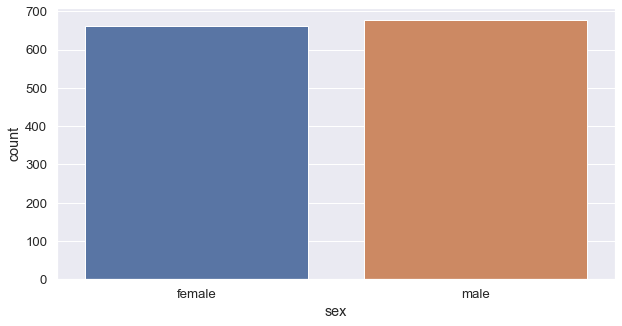

----------------------------------------------------------------------------------------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


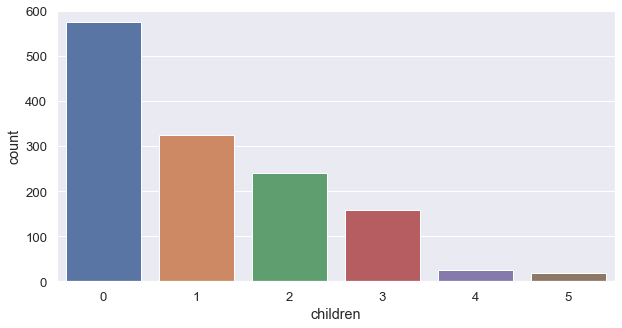

----------------------------------------------------------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64


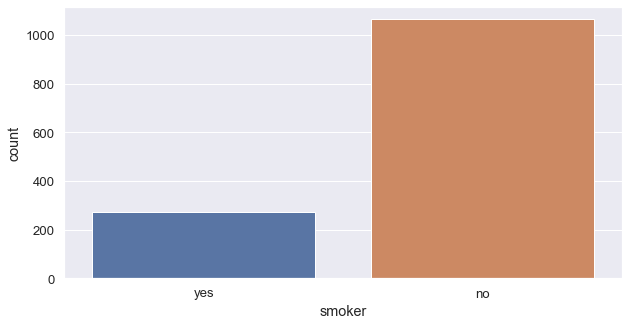

----------------------------------------------------------------------------------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


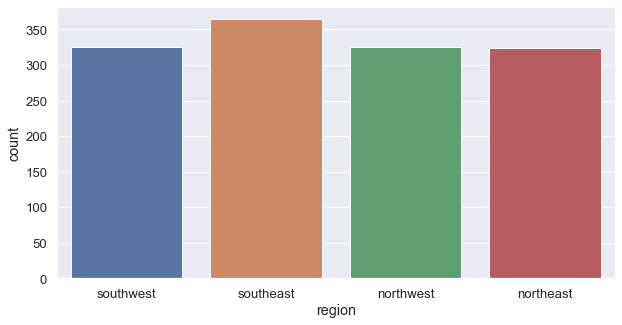

In [38]:
for col in df[['sex', 'children', 'smoker', 'region']]:
    print('-'*100)
    print(df[col].value_counts())
    plt.figure(figsize=(10,5))
    sns.countplot(df[col])
    plt.show()

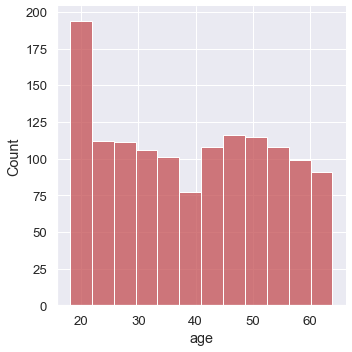

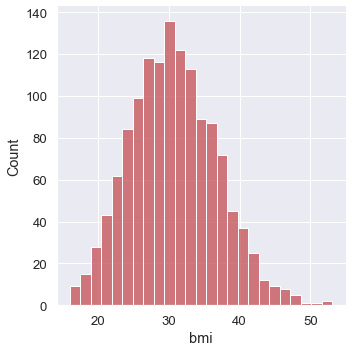

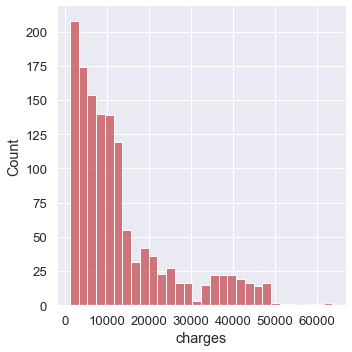

In [32]:
for col in df[['age', 'bmi', 'charges']]:
    sns.displot(df[col], color='r')
    plt.show()

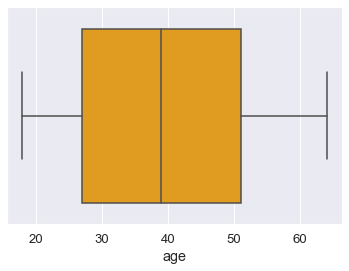

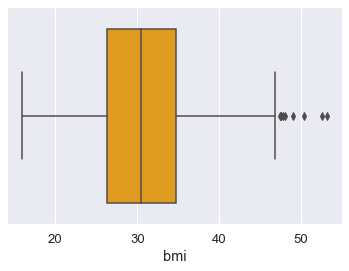

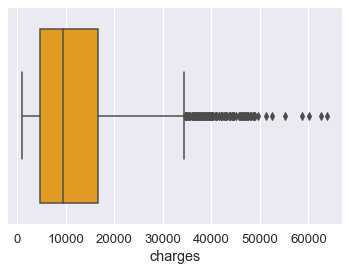

In [37]:
for col in df[['age', 'bmi', 'charges']]:
    sns.boxplot(df[col], color='orange')
    plt.show()

In [50]:
df[df['charges']>=35000]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


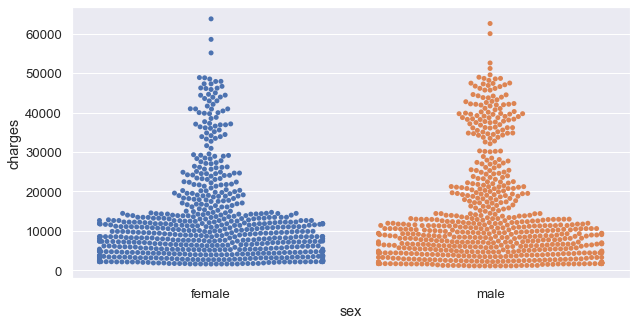

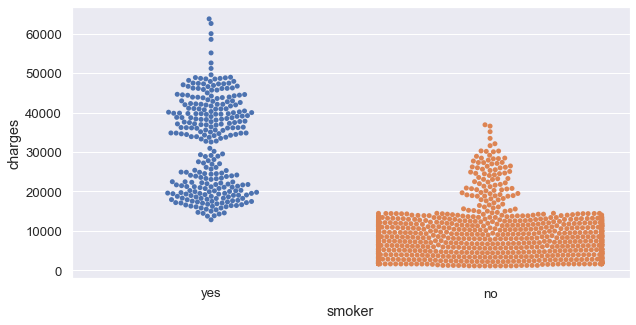

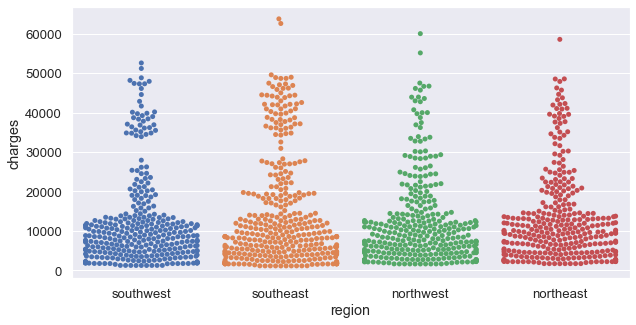

In [66]:
for col in df[['sex', 'smoker', 'region']]:
    plt.figure(figsize=(10,5))
    sns.swarmplot(x=df[col], y=df['charges'])
    plt.show()

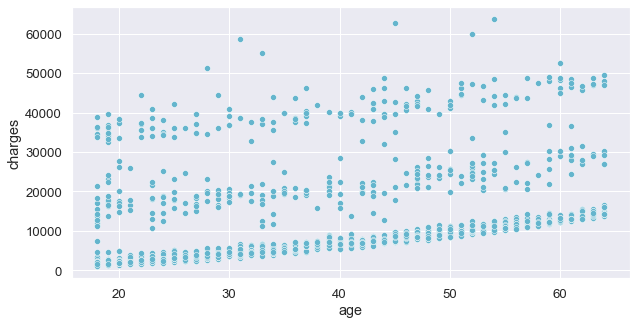

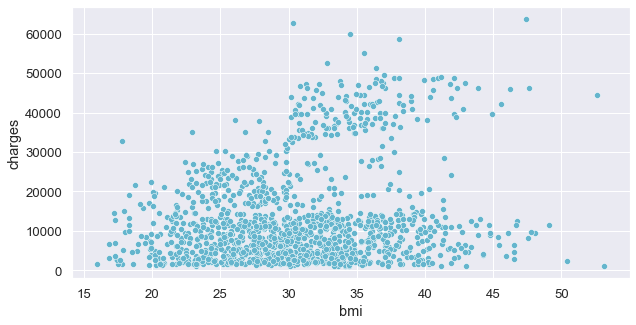

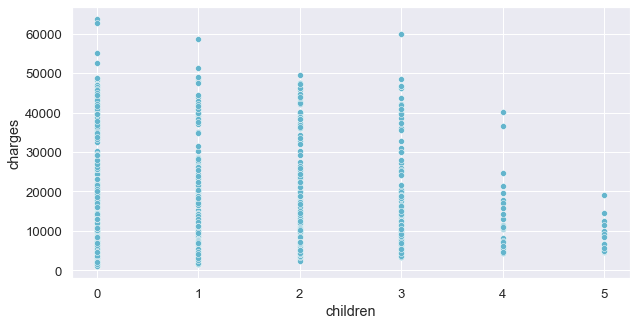

In [97]:
for col in df[['age', 'bmi', 'children']]:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=df, x=col, y='charges', color='c')
    plt.show()

In [98]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [99]:
for col in df[['sex', 'smoker', 'region']]:
    df[col] = LabelEncoder().fit_transform(df[col])

In [101]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<AxesSubplot:>

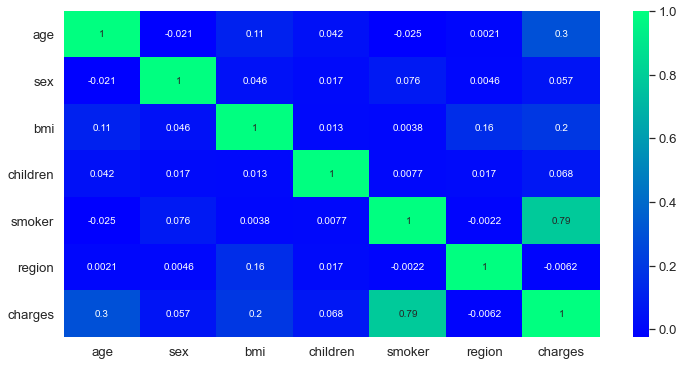

In [115]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='winter')

In [203]:
x = df.drop('charges', axis=1) 
y = df['charges']

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [205]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [206]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [207]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.7417049283233981
Test Score: 0.7833463107364537
------------------------------
Using model: DT
Training Score: 0.9983078124756305
Test Score: 0.7231898491299524
------------------------------
Using model: RF
Training Score: 0.9739070220999732
Test Score: 0.8673508307609064
------------------------------
Using model: XGBR
Training Score: 0.9923791497559626
Test Score: 0.8546465198890332
------------------------------
Using model: KNNR
Training Score: 0.8700466430024817
Test Score: 0.8345213343512302
------------------------------
Using model: SVR
Training Score: -0.09274481429181258
Test Score: -0.06821813183902203
